In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\shirl\AppData\Local\Temp\ipykernel_19896\1136048563.py:6: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("D:\data_train.csv")


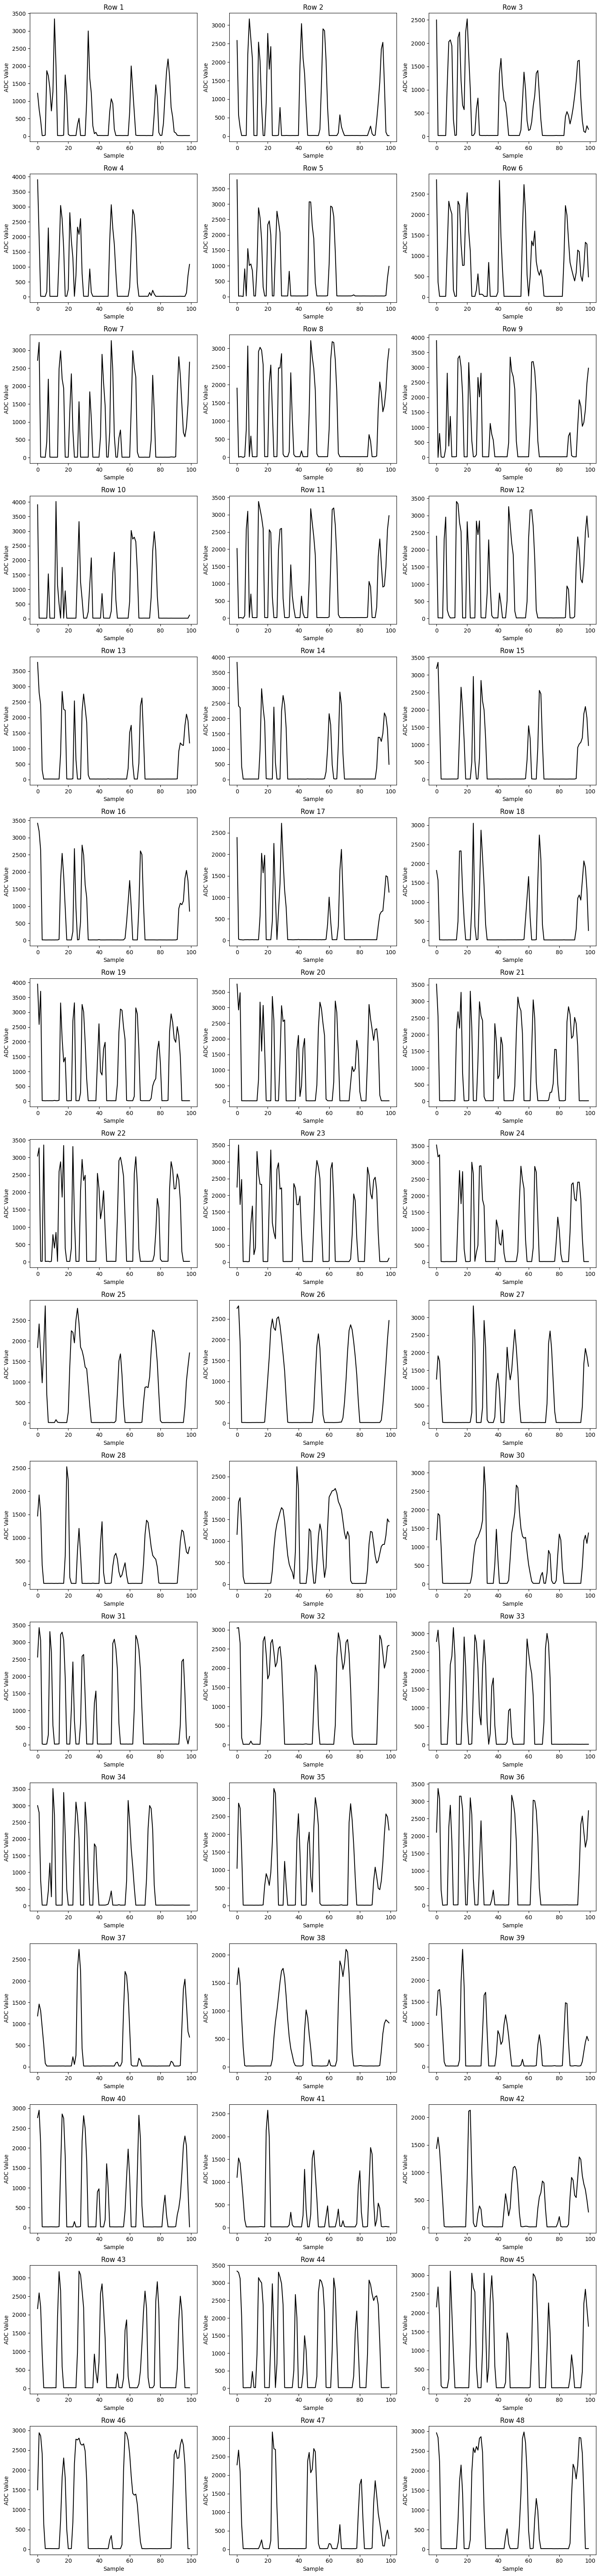

In [34]:
# assuming data starts at column a
a = 1
dt = 1
num_samples = 100

df = pd.read_csv("D:\data_train.csv")

t = np.arange(0,num_samples,dt)

num_rows = len(df)
cols = 3
rows = int(np.ceil(num_rows / cols))

fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
axes = axes.flatten()

for i in range(len(df)):
    f = df.iloc[i,a:num_samples+2].tolist()
    axes[i].plot(t, f, color='k')
    axes[i].set_title(f"Row {i+1}")
    axes[i].set_xlabel("Sample")
    axes[i].set_ylabel("ADC Value")

plt.tight_layout()
plt.show()

d:\Anaconda\envs\ece4179v3\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
d:\Anaconda\envs\ece4179v3\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


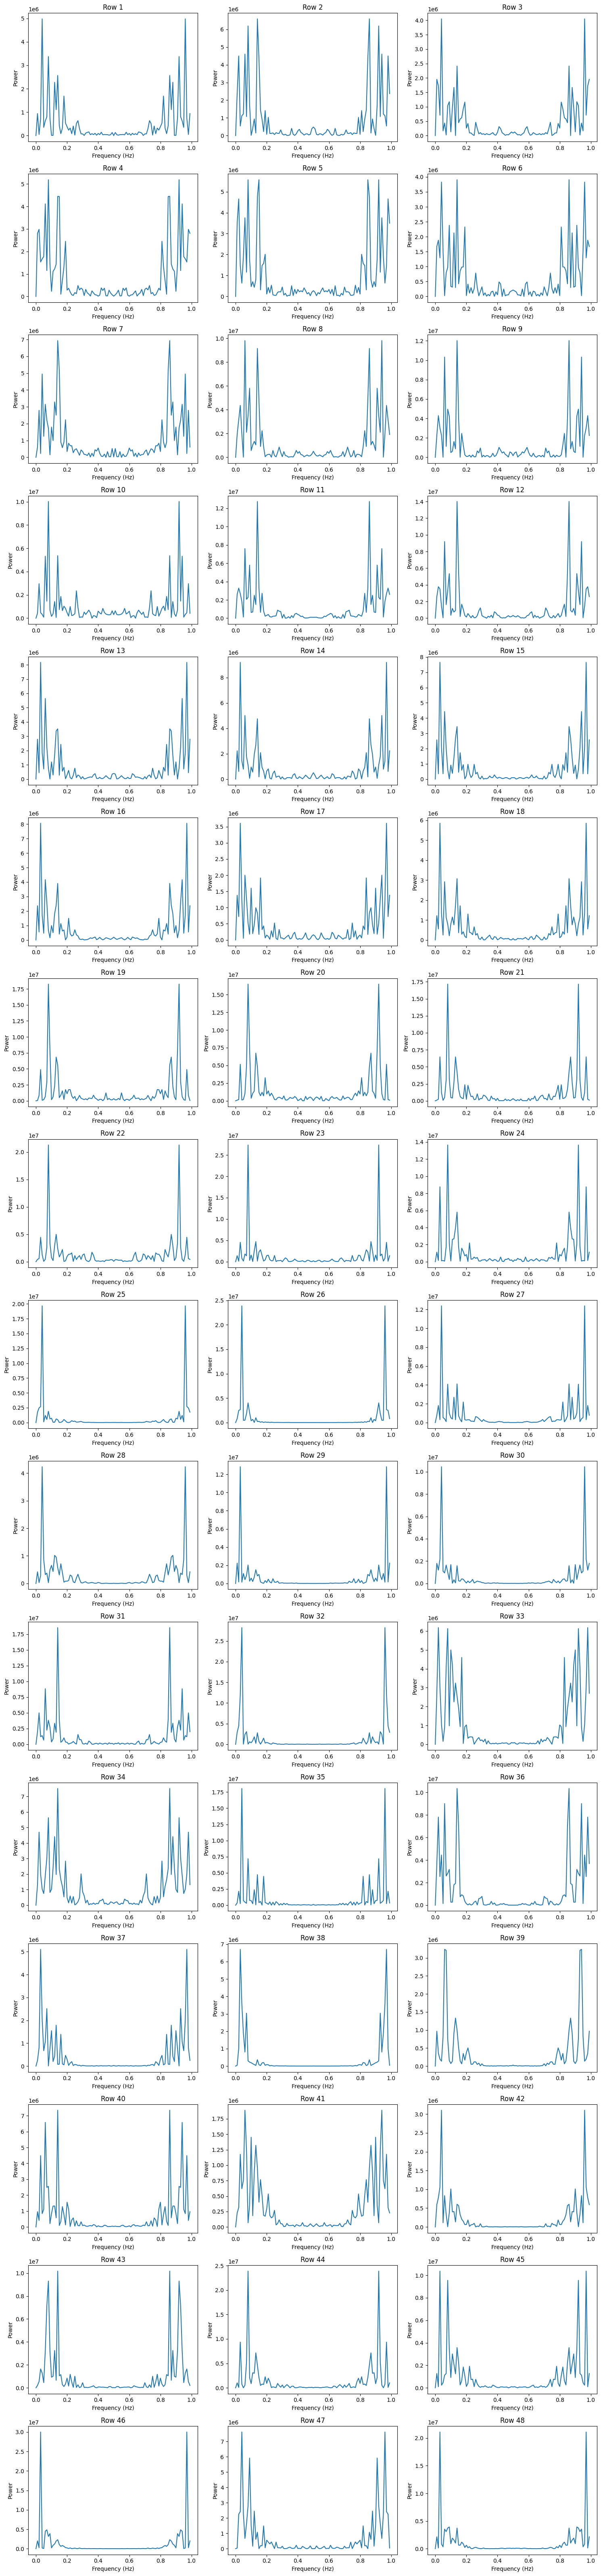

In [35]:
fig_2, axes_2 = plt.subplots(rows, cols, figsize=(15, 4 * rows))
axes_2 = axes_2.flatten()
PSD_list = []

for j in range(len(df)):
    f = df.iloc[j,a:num_samples+2].tolist()
    f_trans = f - np.mean(f)
    n = len(t)
    fhat = np.fft.fft(f_trans,n)
    PSD = fhat*np.conj(fhat)/n
    PSD_list.append(PSD)
    freq = (1/(dt*n))*np.arange(n)

    axes_2[j].plot(freq,PSD)
    axes_2[j].set_title(f"Row {j+1}")
    axes_2[j].set_xlabel("Frequency (Hz)")
    axes_2[j].set_ylabel("Power")

plt.tight_layout()
plt.show()

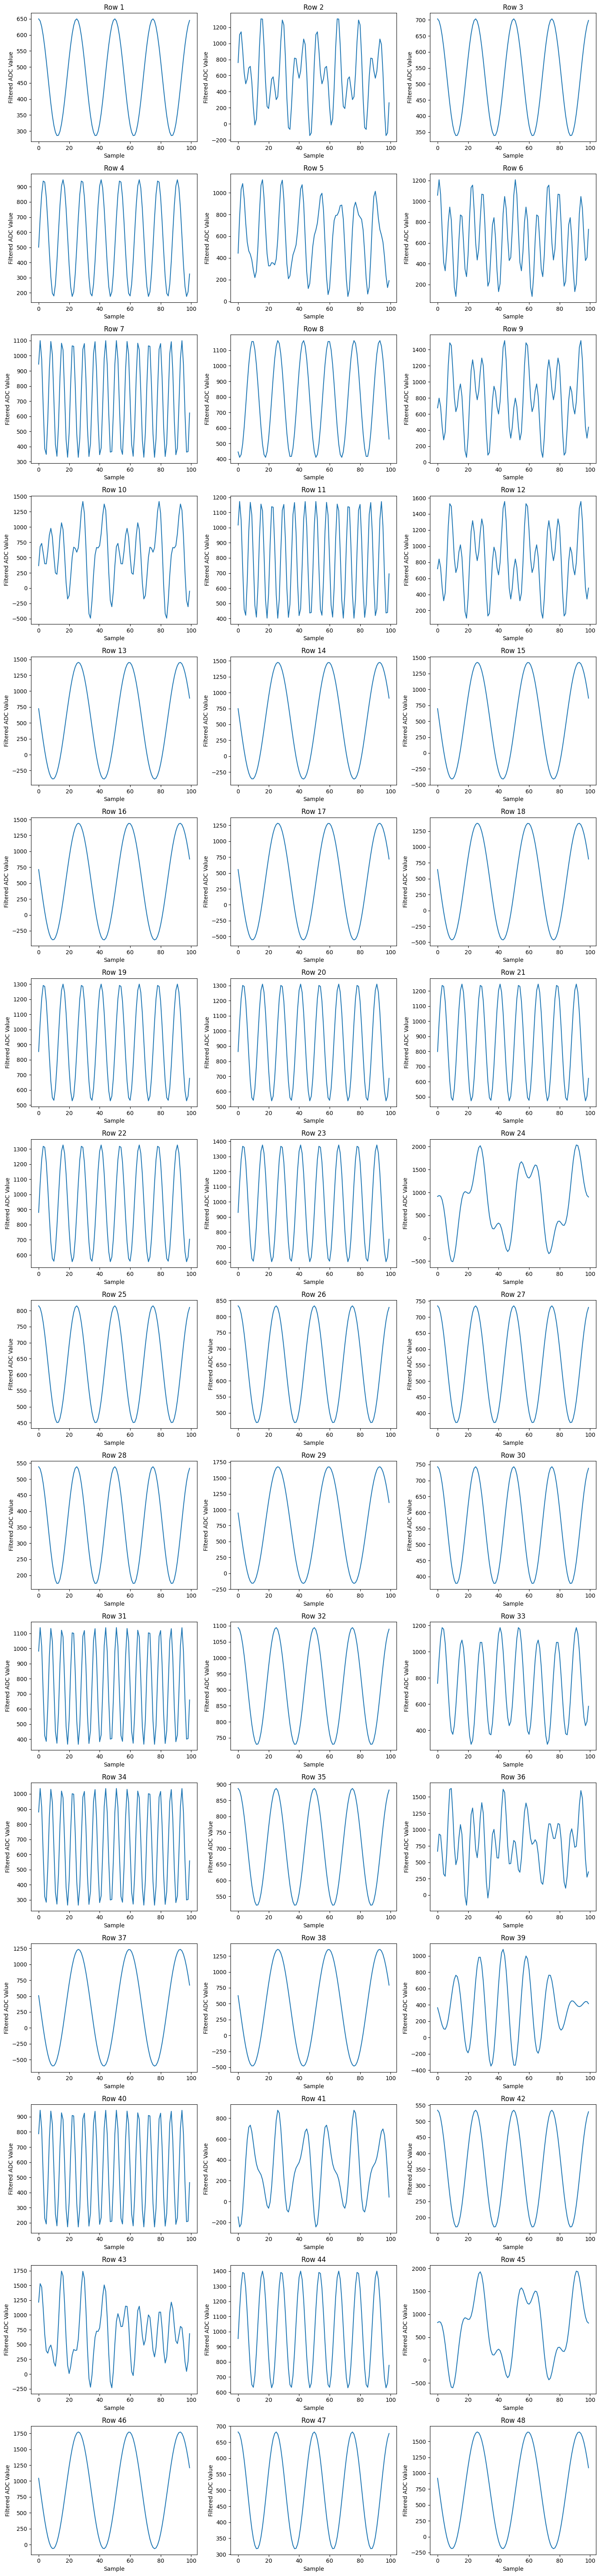

In [36]:
# to collect the index of the highest peak of the power spectrum, deduct the max by a certain window
window = 0.5

fig_3, axes_3 = plt.subplots(rows, cols, figsize=(15, 4 * rows))
axes_3 = axes_3.flatten()
for k in range(len(df)):
    f = df.iloc[k,a:num_samples+2].tolist()

    # find the index of the highest peak
    if (max(PSD_list[k])>1e7):
        psd_deduct = window*1e7
    else:
        psd_deduct = window*1e6    
    f_correct = PSD_list[k]>(max(PSD_list[k])-psd_deduct)

    PSD_clean = PSD_list[k]*f_correct
    fhat_filter = f_correct*fhat
    ffilt = np.fft.ifft(fhat_filter)

    ffilt = ffilt + np.mean(f)
    axes_3[k].plot(t,ffilt)
    axes_3[k].set_title(f"Row {k+1}")
    axes_3[k].set_xlabel("Sample")
    axes_3[k].set_ylabel("Filtered ADC Value")

plt.tight_layout()
plt.show()